In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

In [5]:
# Wavefunction generation
from scf_runs import run_lda_he, run_casci
scf_checkfile, opt_checkfile, mf_lda = run_lda_he()
ci_checkfile, mc = run_casci(scf_checkfile, ncas=4, nroots=4)

He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1

WARN: Mulitple states found in CASCI solver. First state is used to compute the Fock matrix and natural orbitals in active space.

CASCI state   0  E = -2.88192509025559  E(CI) = -2.88192509025559  S^2 = 0.0000000
CASCI state   1  E = -1.40116327670131  E(CI) = -1.40116327670131  S^2 = 2.0000000
CASCI state   2  E = -0.951769234759041  E(CI) = -0.951769234759041  S^2 = 0.0000000
CASCI state   3  E = -0.384692858905305  E(CI) = -0.384692858905305  S^2 = 2.0000000


In [6]:
import importlib, recipes, linemin, sample_many
modules = [recipes, linemin, sample_many]
for m in modules:
    importlib.reload(m)


for fname in ['sj.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING VMC OPTIMIZATION")

recipes.OPTIMIZE(scf_checkfile, "sj.hdf5", 
                 ci_checkfile=ci_checkfile,
                 max_iterations=6, 
                 nconfig=1000, 
                 verbose=True,
                 # jastrow_kws={"ion_cusp":False}
                )

# Jastrow optimization results
df = recipes.read_opt("sj.hdf5")

# with h5py.File("sj.hdf5") as f:
#     print("keys", list(f.keys()))
#     print("wave function parameters", list(f['wf'].keys()))
#     ee_j = f['energy'][...]   
#     x = f['x'][...]
#     yfit = f['yfit'][...]
#     # pgrad = f['pgradient'][...]   
#     print(f['wf/wf2acoeff'][()])
#     print(f['wf/wf2bcoeff'][()])



RUNNING VMC OPTIMIZATION
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.503623438814463
Dot product between gradient and SR step:  0.9036944050007155
descent en -2.8509836815382092 0.017646994117718397
energies from correlated sampling [-2.51788313 -2.69299291 -2.8138283  -2.888733   -2.92565166]
----------vmc done
Gradient norm:  0.14751362369495064
Dot product between gradient and SR step:  0.9313667313504065
descent en -2.880004958326407 0.006747280885229397
energies from correlated sampling [-2.88868798 -2.89661988 -2.90271799 -2.90673674 -2.90841054]
----------vmc done
Gradient norm:  0.013680051286936121
Dot product between gradient and SR step:  0.983061846148398
descent en -2.88098704686966 0.004592259857627153
energies from correlated sampling [-2.87071052 -2.87208777 -2.87343173 -2.87474268 -2.87602093]
----------vmc done
Gradient norm:  0.02560490372496968
Dot product between gradient and SR step:  0.9150607544256615
descent en -2.8882828221394914 0.005

In [7]:
df

,energy,iteration,error,fname
0,-2.850984,0,0.017647,sj.hdf5
1,-2.880005,1,0.006747,sj.hdf5
2,-2.880987,2,0.004592,sj.hdf5
3,-2.888283,3,0.005487,sj.hdf5
4,-2.891786,4,0.005779,sj.hdf5
5,-2.879011,5,0.002927,sj.hdf5


In [10]:
import wftools, bosonrecipes, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools
modules = [bosonrecipes,wftools, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools]
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
abvmc_file = 'abvmc-j-he_multi.hdf5'
for fname in [abvmc_file]:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION")

nblocks = 100
nsteps_per_block = 10
tstep=0.3
nconfig=1000
bosonrecipes.ABOPTIMIZE(scf_checkfile, 
                  abvmc_file, 
                  ci_checkfile=ci_checkfile,                        
                  max_iterations=6, 
                  verbose=True,  
                  # nblocks=nblocks, 
                  # nsteps_per_block=nsteps_per_block,
                  # tstep= tstep, 
                  nconfig=nconfig)
recipes.read_opt(abvmc_file)

RUNNING ABVMC OPTIMIZATION
Number of determinants in the bosonic wavefunction= 16
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  1.731907655203567
Dot product between gradient and SR step:  0.9257941389371012
descent en -1.8990807213359502 0.030248973390528913
energies from correlated sampling [-0.15164224 -2.05561381 -2.96099358 -3.31277286 -3.37900352]
----------vmc done
Gradient norm:  1.0358551048992464
Dot product between gradient and SR step:  0.9415192406228756


KeyboardInterrupt: 

keys ['SRdot', 'configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'pgrad', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 2.          2.        ]
  [ 0.06183297  0.0615108 ]
  [ 0.09020955  0.09350048]
  [-0.06520854 -0.01416089]
  [-0.38341864 -0.2552313 ]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.         -0.02699336  0.        ]
 [ 0.         -0.15078172  0.        ]
 [ 0.         -0.20641253  0.        ]]


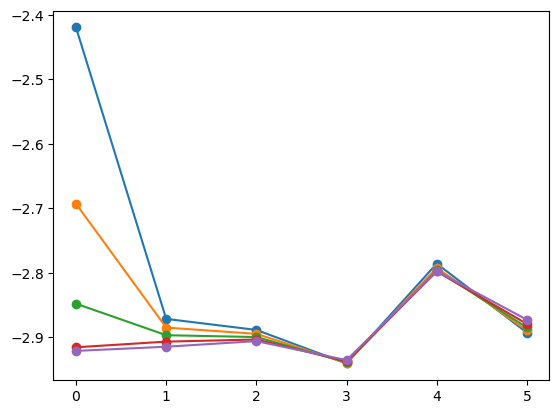

In [7]:
with h5py.File(abvmc_file) as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    # pgrad = f['pgradient'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


Text(0, 0.5, 'Partial gradients')

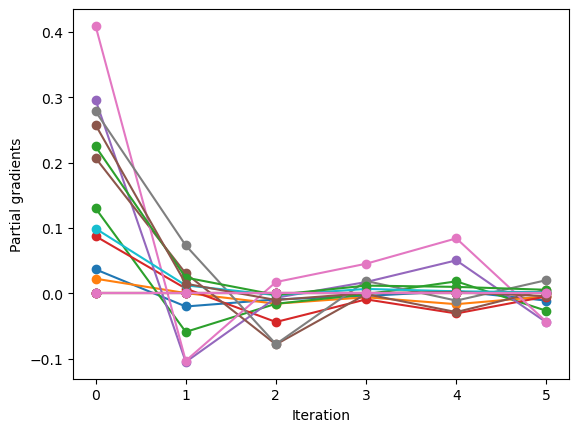

In [8]:
f = h5py.File(abvmc_file)
aa=f['pgrad'][...]
import matplotlib.pyplot as plt
plt.plot(aa, marker='o', label="etot")
plt.xlabel('Iteration')
plt.ylabel('Partial gradients')

In [175]:
# def get_variance(df, 
#                  discard = 10):
#     keys = df.keys()
#     numblocks = df[keys[0]].shape[0]
#     num_used_blocks = numblocks - discard
#     print('\t\t\t{:10s} {:6s} {:3s}'.format('Mean', 'Var', 'Ratio'))
#     for k in keys:
#         eb = df[k][discard:]
#         mean = np.mean(eb)
#         var = np.sqrt(1/(num_used_blocks - 1 ) * np.sum(eb**2 - mean**2))
#         print('{} \t {:.6f} \t {:.6f} {:.3f}'.format(k, mean, var, np.abs(var/mean)))

In [30]:
# get_variance(bosonrecipes.read_abvmc("bosonvmc.hdf5"),
#             discard=0)
# df2 = bosonrecipes.read_abvmc("bosonvmc.hdf5")
# df2
# plt.plot(df2['energytotal'], '-o', label='tot')
# # plt.plot(df2['energyei'], label='ei')
# # plt.plot(df2['energyee'], label='ee')
# # plt.plot(df2['energyke'], label='ke')
# # plt.plot(df2['energyvxc'], label='vxc')
# # plt.axhline(y=0, linestyle='dashed')
# plt.legend()

In [17]:
import importlib, recipes, bosonrecipes, bosonslater, bosonaccumulators, bosonwftools 
modules = [recipes, bosonrecipes, bosonrecipes, bosonslater, bosonaccumulators, bosonwftools] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
    
for fname in ['bosonsjnoi.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION NO ION CUSP")
wf, df = bosonrecipes.ABOPTIMIZE(scf_checkfile, "bosonsjnoi.hdf5", max_iterations=24, nconfig=1000, verbose=True,
                                jastrow_kws={"ion_cusp":False}
                                )

# Jastrow optimization results
dfnoi = pyq.read_opt("bosonsjnoi.hdf5")
dfnoi



RUNNING ABVMC OPTIMIZATION NO ION CUSP
Number of determinants in the bosonic wavefunction= 1
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.1453199792541806
Dot product between gradient and SR step:  0.9784617716604322
descent en -2.8666383753081197 0.0013890246203200724
energies from correlated sampling [-2.79603046 -2.82335953 -2.84618373 -2.86489457 -2.87984999]
----------vmc done
Gradient norm:  0.04944151437772344
Dot product between gradient and SR step:  0.9877517491069976
descent en -2.8891615788326606 0.0016532874021162169
energies from correlated sampling [-2.87774984 -2.87969227 -2.88151087 -2.88320591 -2.88477768]
----------vmc done
Gradient norm:  0.031107552629770007
Dot product between gradient and SR step:  0.9888479405707269
descent en -2.889596875293664 0.001612251778042078
energies from correlated sampling [-2.87433707 -2.87568714 -2.87697399 -2.87819816 -2.87936013]
----------vmc done
Gradient norm:  0.02843026307168962
Do

,energy,iteration,error,fname
0,-2.866638,0,0.001389,bosonsjnoi.hdf5
1,-2.889162,1,0.001653,bosonsjnoi.hdf5
2,-2.889597,2,0.001612,bosonsjnoi.hdf5
3,-2.886646,3,0.001079,bosonsjnoi.hdf5
4,-2.889349,4,0.000861,bosonsjnoi.hdf5
5,-2.889454,5,0.001528,bosonsjnoi.hdf5
6,-2.891159,6,0.001383,bosonsjnoi.hdf5
7,-2.893427,7,0.000784,bosonsjnoi.hdf5
8,-2.890395,8,0.001207,bosonsjnoi.hdf5
9,-2.890467,9,0.001246,bosonsjnoi.hdf5


keys ['SRdot', 'configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'pgrad', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 0.14807857  0.14986633]
  [ 0.22169254  0.22336089]
  [ 0.06112087  0.06198473]
  [-0.04934876 -0.04688615]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.         -0.06997235  0.        ]
 [ 0.         -0.26191307  0.        ]
 [ 0.         -0.15962388  0.        ]]


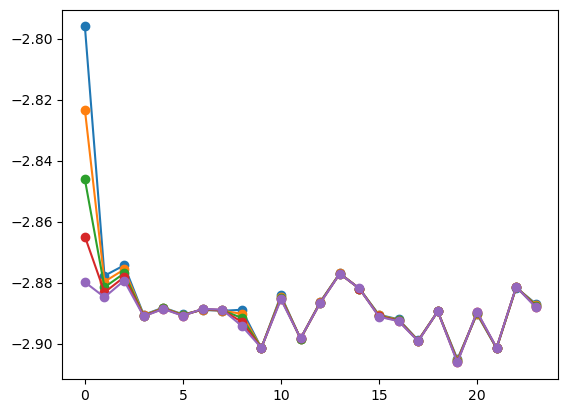

In [24]:
with h5py.File("bosonsjnoi.hdf5") as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    pgrad = f['pgrad'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


In [25]:
# f = h5py.File("bosonsjnoi.hdf5")
# aa=f['params'][...]
# import matplotlib.pyplot as plt
# plt.plot(aa, marker='o', label="etot")
# plt.xlabel('Iteration')
# plt.ylabel('Value of Jastrow parameters')